# Analyzing average experiment partial results

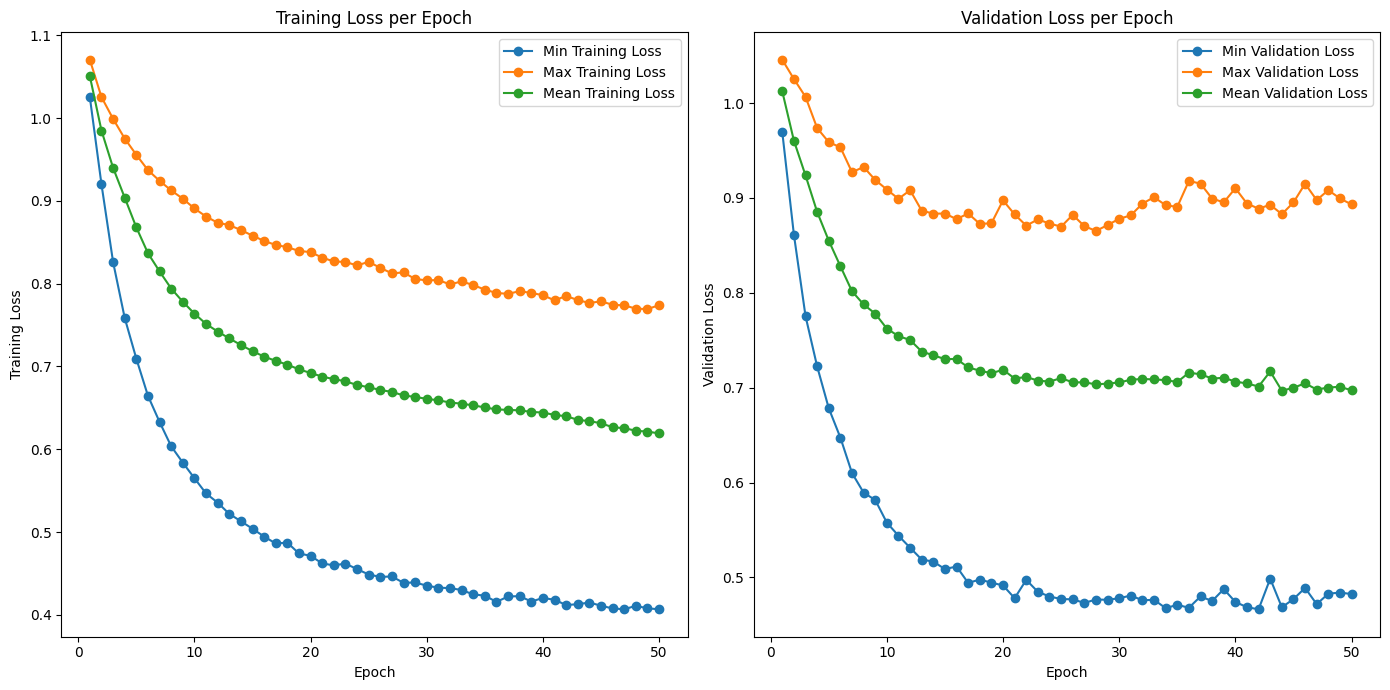

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the data from the text file
file_path = 'quantum_lstm_3class_2edition_qfixed.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the lines to extract relevant data
data = []
for line in lines:
    match = re.search(r'Iteration (\d+), Epoch (\d+), Accuracy: ([\d\.]+), Loss: ([\d\.]+), Validation Accuracy: ([\d\.]+), Validation Loss: ([\d\.]+)', line)
    if match:
        iteration = int(match.group(1))
        if iteration not in [1, 3]:  # Skip iteration 1 and 3
            epoch = int(match.group(2))
            accuracy = float(match.group(3))
            loss = float(match.group(4))
            val_accuracy = float(match.group(5))
            val_loss = float(match.group(6))
            data.append((iteration, epoch, accuracy, loss, val_accuracy, val_loss))

# Create a DataFrame from the parsed data
df = pd.DataFrame(data, columns=['Iteration', 'Epoch', 'Accuracy', 'Loss', 'Val_Accuracy', 'Val_Loss'])

# Group the data by epoch and calculate min, max, and mean for loss and validation loss
grouped = df.groupby('Epoch').agg({
    'Loss': ['min', 'max', 'mean'],
    'Val_Loss': ['min', 'max', 'mean']
}).reset_index()

# Flatten the MultiIndex columns
grouped.columns = ['Epoch', 'Loss_min', 'Loss_max', 'Loss_mean', 'Val_Loss_min', 'Val_Loss_max', 'Val_Loss_mean']

# Plot the data
plt.figure(figsize=(14, 7))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(grouped['Epoch'], grouped['Loss_min'], label='Min Training Loss', marker='o')
plt.plot(grouped['Epoch'], grouped['Loss_max'], label='Max Training Loss', marker='o')
plt.plot(grouped['Epoch'], grouped['Loss_mean'], label='Mean Training Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss per Epoch')
plt.legend()

# Validation Loss
plt.subplot(1, 2, 2)
plt.plot(grouped['Epoch'], grouped['Val_Loss_min'], label='Min Validation Loss', marker='o')
plt.plot(grouped['Epoch'], grouped['Val_Loss_max'], label='Max Validation Loss', marker='o')
plt.plot(grouped['Epoch'], grouped['Val_Loss_mean'], label='Mean Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss per Epoch')
plt.legend()

plt.tight_layout()
plt.show()

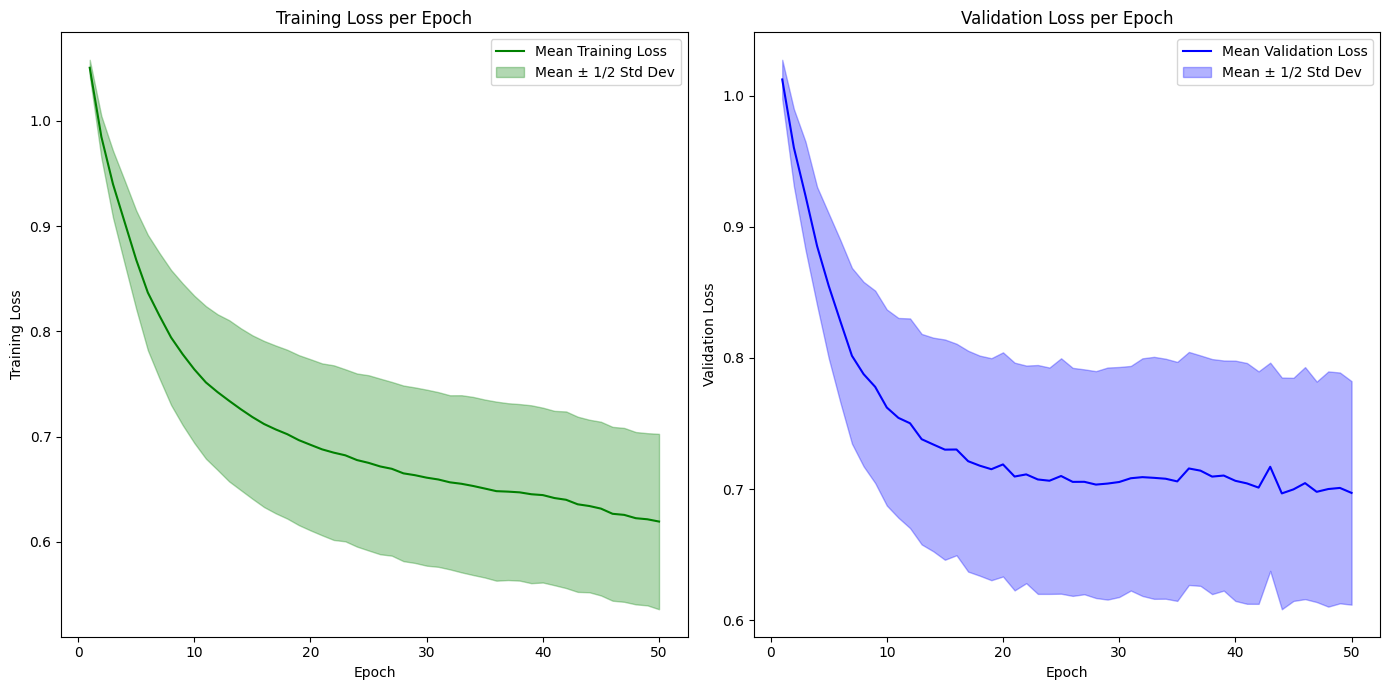

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the data from the text file
file_path = 'quantum_lstm_3class_2edition_qfixed.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse the lines to extract relevant data
data = []
for line in lines:
    match = re.search(r'Iteration (\d+), Epoch (\d+), Accuracy: ([\d\.]+), Loss: ([\d\.]+), Validation Accuracy: ([\d\.]+), Validation Loss: ([\d\.]+)', line)
    if match:
        iteration = int(match.group(1))
        if iteration not in [1, 3]:  # Skip iteration 1 and 3
            epoch = int(match.group(2))
            accuracy = float(match.group(3))
            loss = float(match.group(4))
            val_accuracy = float(match.group(5))
            val_loss = float(match.group(6))
            data.append((iteration, epoch, accuracy, loss, val_accuracy, val_loss))

# Create a DataFrame from the parsed data
df = pd.DataFrame(data, columns=['Iteration', 'Epoch', 'Accuracy', 'Loss', 'Val_Accuracy', 'Val_Loss'])

# Group the data by epoch and calculate min, max, mean, and std for loss and validation loss
grouped = df.groupby('Epoch').agg({
    'Loss': ['min', 'max', 'mean', 'std'],
    'Val_Loss': ['min', 'max', 'mean', 'std']
}).reset_index()

# Flatten the MultiIndex columns
grouped.columns = ['Epoch', 'Loss_min', 'Loss_max', 'Loss_mean', 'Loss_std', 'Val_Loss_min', 'Val_Loss_max', 'Val_Loss_mean', 'Val_Loss_std']

# Plot the data
plt.figure(figsize=(14, 7))

# Training Loss
plt.subplot(1, 2, 1)
plt.plot(grouped['Epoch'], grouped['Loss_mean'], label='Mean Training Loss', color='green')
plt.fill_between(grouped['Epoch'], grouped['Loss_mean'] - grouped['Loss_std']/2, grouped['Loss_mean'] + grouped['Loss_std']/2, color='green', alpha=0.3, label='Mean ± 1/2 Std Dev')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss per Epoch')
plt.legend()

# Validation Loss
plt.subplot(1, 2, 2)
plt.plot(grouped['Epoch'], grouped['Val_Loss_mean'], label='Mean Validation Loss', color='blue')
plt.fill_between(grouped['Epoch'], grouped['Val_Loss_mean'] - grouped['Val_Loss_std']/2, grouped['Val_Loss_mean'] + grouped['Val_Loss_std']/2, color='blue', alpha=0.3, label='Mean ± 1/2 Std Dev')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss per Epoch')
plt.legend()

plt.tight_layout()
plt.show()

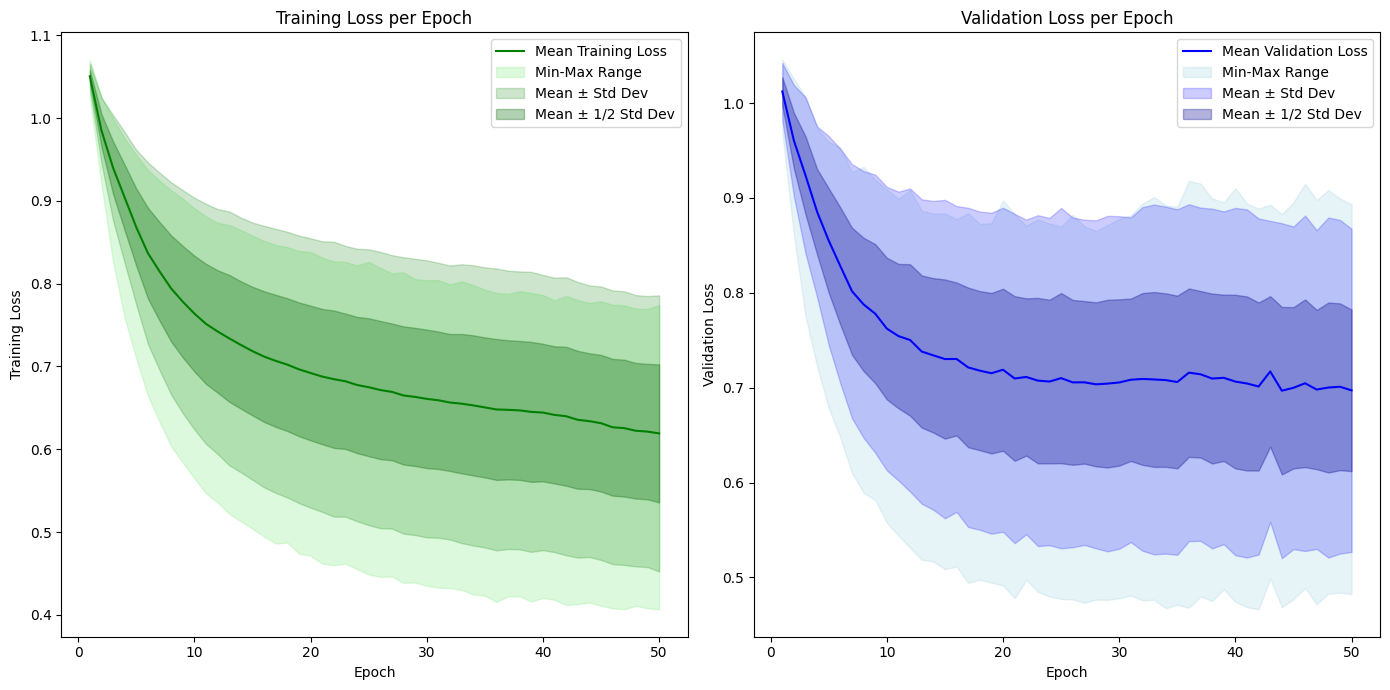

In [3]:
# Analizar las líneas para extraer los datos relevantes
data = []
for line in lines:
    match = re.search(r'Iteration (\d+), Epoch (\d+), Accuracy: ([\d\.]+), Loss: ([\d\.]+), Validation Accuracy: ([\d\.]+), Validation Loss: ([\d\.]+)', line)
    if match:
        iteration = int(match.group(1))
        if iteration not in [1, 3]:  # Omitir iteraciones 1 y 3
            epoch = int(match.group(2))
            accuracy = float(match.group(3))
            loss = float(match.group(4))
            val_accuracy = float(match.group(5))
            val_loss = float(match.group(6))
            data.append((iteration, epoch, accuracy, loss, val_accuracy, val_loss))

# Crear un DataFrame a partir de los datos analizados
df = pd.DataFrame(data, columns=['Iteration', 'Epoch', 'Accuracy', 'Loss', 'Val_Accuracy', 'Val_Loss'])

# Agrupar los datos por época y calcular min, max, mean, y std para la pérdida y la pérdida de validación
grouped = df.groupby('Epoch').agg({
    'Loss': ['min', 'max', 'mean', 'std'],
    'Val_Loss': ['min', 'max', 'mean', 'std']
}).reset_index()

# Aplanar las columnas MultiIndex
grouped.columns = ['Epoch', 'Loss_min', 'Loss_max', 'Loss_mean', 'Loss_std', 'Val_Loss_min', 'Val_Loss_max', 'Val_Loss_mean', 'Val_Loss_std']

# Graficar los datos
plt.figure(figsize=(14, 7))

# Pérdida de entrenamiento
plt.subplot(1, 2, 1)
plt.plot(grouped['Epoch'], grouped['Loss_mean'], label='Mean Training Loss', color='green')
plt.fill_between(grouped['Epoch'], grouped['Loss_min'], grouped['Loss_max'], color='lightgreen', alpha=0.3, label='Min-Max Range')
plt.fill_between(grouped['Epoch'], grouped['Loss_mean'] - grouped['Loss_std'], grouped['Loss_mean'] + grouped['Loss_std'], color='green', alpha=0.2, label='Mean ± Std Dev')
plt.fill_between(grouped['Epoch'], grouped['Loss_mean'] - grouped['Loss_std']/2, grouped['Loss_mean'] + grouped['Loss_std']/2, color='darkgreen', alpha=0.3, label='Mean ± 1/2 Std Dev')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss per Epoch')
plt.legend()

# Pérdida de validación
plt.subplot(1, 2, 2)
plt.plot(grouped['Epoch'], grouped['Val_Loss_mean'], label='Mean Validation Loss', color='blue')
plt.fill_between(grouped['Epoch'], grouped['Val_Loss_min'], grouped['Val_Loss_max'], color='lightblue', alpha=0.3, label='Min-Max Range')
plt.fill_between(grouped['Epoch'], grouped['Val_Loss_mean'] - grouped['Val_Loss_std'], grouped['Val_Loss_mean'] + grouped['Val_Loss_std'], color='blue', alpha=0.2, label='Mean ± Std Dev')
plt.fill_between(grouped['Epoch'], grouped['Val_Loss_mean'] - grouped['Val_Loss_std']/2, grouped['Val_Loss_mean'] + grouped['Val_Loss_std']/2, color='darkblue', alpha=0.3, label='Mean ± 1/2 Std Dev')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss per Epoch')
plt.legend()

plt.tight_layout()
plt.show()

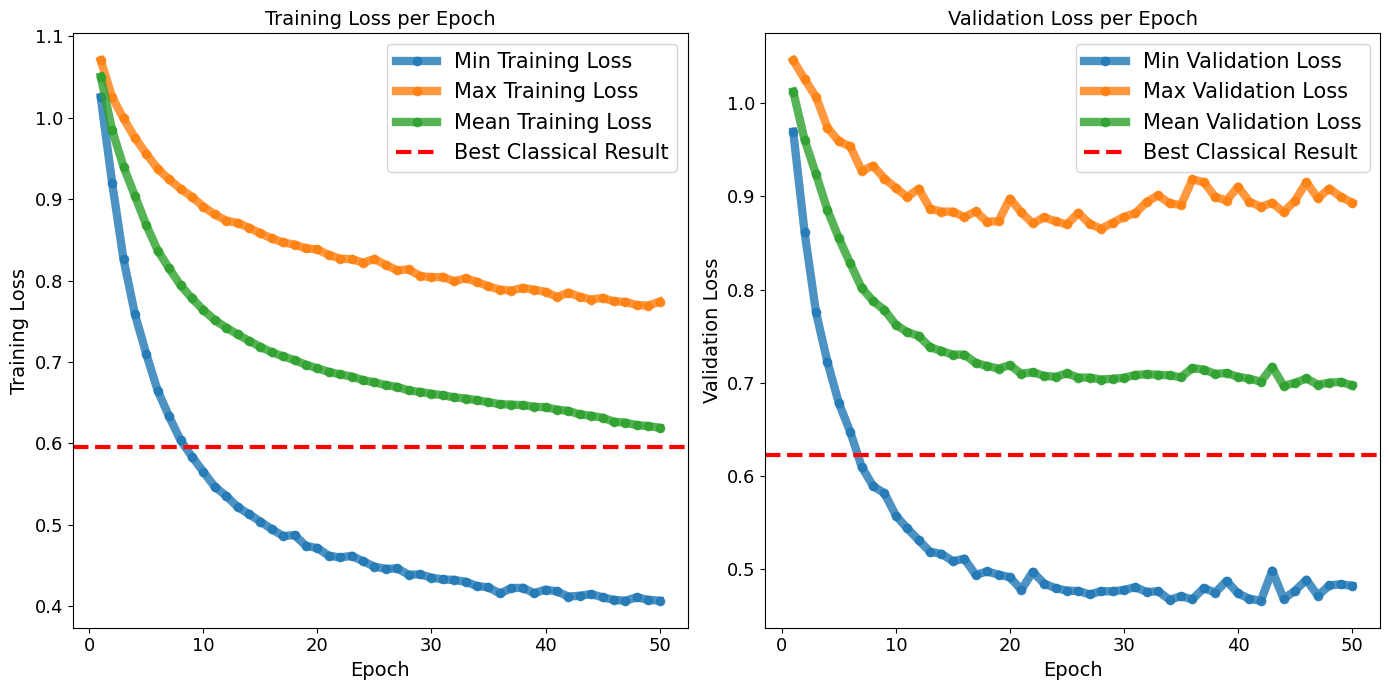

In [9]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Function to parse the original data file
def parse_original_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = []
    for line in lines:
        match = re.search(r'Iteration (\d+), Epoch (\d+), Accuracy: ([\d\.]+), Loss: ([\d\.]+), Validation Accuracy: ([\d\.]+), Validation Loss: ([\d\.]+)', line)
        if match:
            iteration = int(match.group(1))
            if iteration not in [1, 3]:  # Skip iteration 1 and 3
                epoch = int(match.group(2))
                accuracy = float(match.group(3))
                loss = float(match.group(4))
                val_accuracy = float(match.group(5))
                val_loss = float(match.group(6))
                data.append((iteration, epoch, accuracy, loss, val_accuracy, val_loss))

    return pd.DataFrame(data, columns=['Iteration', 'Epoch', 'Accuracy', 'Loss', 'Val_Accuracy', 'Val_Loss'])

def parse_new_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = []
    for line in lines:
        match = re.search(r'Epoch (\d+), Accuracy: ([\d\.]+), Loss: ([\d\.]+), Validation Accuracy: ([\d\.]+), Validation Loss: ([\d\.]+)', line)
        if match:
            epoch = int(match.group(1))
            if epoch <= 50:  # Take only the first 50 epochs
                accuracy = float(match.group(2))
                loss = float(match.group(3))
                val_accuracy = float(match.group(4))
                val_loss = float(match.group(5))
                data.append((epoch, accuracy, loss, val_accuracy, val_loss))

    return pd.DataFrame(data, columns=['Epoch', 'Accuracy', 'Loss', 'Val_Accuracy', 'Val_Loss'])

# Paths to the original and new data files
original_file_path = 'quantum_lstm_3class_2edition_qfixed.txt'
new_file_path = 'classical_lstm_3class_2edition.txt'

# Parse the data
original_df = parse_original_data(original_file_path)
new_df = parse_new_data(new_file_path)

# Group the original data by epoch and calculate min, max, and mean for loss and validation loss
grouped = original_df.groupby('Epoch').agg({
    'Loss': ['min', 'max', 'mean'],
    'Val_Loss': ['min', 'max', 'mean']
}).reset_index()

# Flatten the MultiIndex columns
grouped.columns = ['Epoch', 'Loss_min', 'Loss_max', 'Loss_mean', 'Val_Loss_min', 'Val_Loss_max', 'Val_Loss_mean']

# Calculate the best classical results
best_classical_loss = new_df['Loss'].min()
best_classical_val_loss = new_df['Val_Loss'].min()

# Style parameters
lw = 6
s = 15
a = .8

# Plot the data
plt.figure(figsize=(14, 7))

# Training Loss
ax1 = plt.subplot(1, 2, 1)
ax1.plot(grouped['Epoch'], grouped['Loss_min'], label='Min Training Loss', marker='o', linewidth=lw, alpha=a)
ax1.plot(grouped['Epoch'], grouped['Loss_max'], label='Max Training Loss', marker='o', linewidth=lw, alpha=a)
ax1.plot(grouped['Epoch'], grouped['Loss_mean'], label='Mean Training Loss', marker='o', linewidth=lw, alpha=a)
ax1.axhline(y=best_classical_loss, color='red', linestyle='--', linewidth=lw//2, label='Best Classical Result')
ax1.set_xlabel('Epoch', size=s - 1)
ax1.set_ylabel('Training Loss', size=s - 1)
ax1.tick_params(axis='both', which='major', labelsize=int(.9*s))
ax1.legend(prop={"size":s})
ax1.set_title('Training Loss per Epoch', size=s - 1)

# Validation Loss
ax2 = plt.subplot(1, 2, 2)
ax2.plot(grouped['Epoch'], grouped['Val_Loss_min'], label='Min Validation Loss', marker='o', linewidth=lw, alpha=a)
ax2.plot(grouped['Epoch'], grouped['Val_Loss_max'], label='Max Validation Loss', marker='o', linewidth=lw, alpha=a)
ax2.plot(grouped['Epoch'], grouped['Val_Loss_mean'], label='Mean Validation Loss', marker='o', linewidth=lw, alpha=a)
ax2.axhline(y=best_classical_val_loss, color='red', linestyle='--', linewidth=lw//2, label='Best Classical Result')
ax2.set_xlabel('Epoch', size=s - 1)
ax2.set_ylabel('Validation Loss', size=s - 1)
ax2.tick_params(axis='both', which='major', labelsize=int(.9*s))
ax2.legend(prop={"size":s})
ax2.set_title('Validation Loss per Epoch', size=s - 1)

plt.tight_layout()
plt.show()